Notebook to test interpolation of Predictions and whole datasets from and to the icosahedral grid.

In [1]:
from interpolate import *
from evaluate import *
import copy

In [3]:
conditions = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING": False, 
                            "CLIMATE_MODEL": "iHadCM3",
                            "GRID_TYPE": "Flat"},  # {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",# {"MODEL_TYPE": "UNet_Flat",
                                   "USE_COORD_CONV": False, 
                                   "USE_CYLINDRICAL_PADDING": False,
                                   "LOSS": "Masked_MSELoss",
                                   "LEARNING_RATE": 1e-3}
                                   # "RUN_NR": 0}
}

base_folder = "Output/Reproduce_new"
output_folder = "Scripts/"

In [4]:
d_l, p_l, gt_l, m_l = load_data_for_comparison(base_folder, conditions)

10 matching runs found


In [5]:
predictions_list, descriptions_list = load_compatible_available_runs(base_folder, conditions)

10 matching runs found


In [4]:
data, gt = get_interpolated_data_and_gt(descriptions_list[0], predictions_list[0], output_folder=base_folder, script_folder=output_folder)

Datasets/iHadCM3/Original/isotopes_yearly.nc



Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.81s 28MB].
Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.08s 22MB].


done


Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    remap: Processed 693792 values from 1 variable over 99 timesteps [0.28s 29MB].
Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    remap: Processed 693792 values from 1 variable over 99 timesteps [0.08s 26MB].


Interpolated file already exists, use existing version.
1 matching runs found


In [11]:
r2 = get_r2(data, gt)

In [9]:
from plotting import *

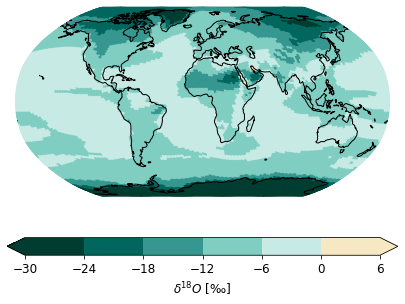

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': mean_style["PROJECTION"]}, figsize=mean_style["FIGSIZE"])

plot_ico_map(ax, np.mean(gt,axis=(0)), {"RESOLUTION": 5}, mean_style)

plt.axis("off")
plt.show()

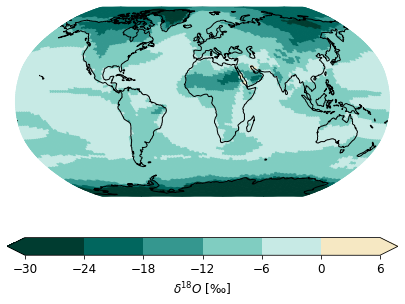

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': mean_style["PROJECTION"]}, figsize=mean_style["FIGSIZE"])

plot_ico_map(ax, np.mean(data,axis=(0)), {"RESOLUTION": 5}, mean_style)

plt.axis("off")
plt.show()

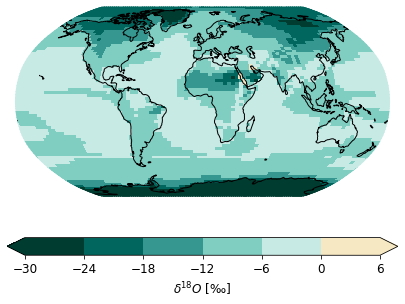

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': mean_style["PROJECTION"]}, figsize=mean_style["FIGSIZE"])

plot_map(ax, np.mean(gt_l[0],axis=(0,1)), descriptions_list[0]["DATASET_DESCRIPTION"], mean_style)

plt.axis("off")
plt.show()

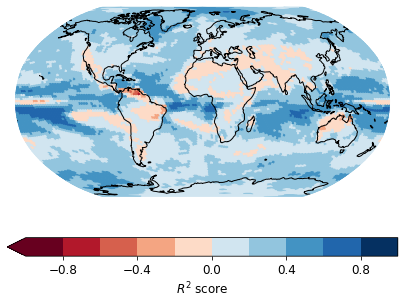

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': r2_style["PROJECTION"]}, figsize=r2_style["FIGSIZE"])

plot_ico_map(ax, r2, {"RESOLUTION": 5}, r2_style)

plt.axis("off")
plt.show()

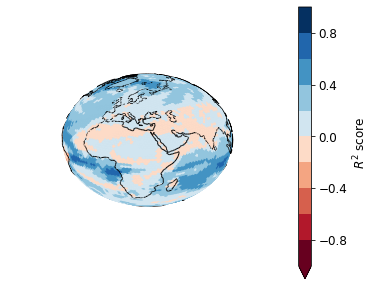

In [20]:
fig = plt.figure(figsize=r2_style["FIGSIZE"])

ax= fig.add_subplot(1,1,1, projection='3d')

plot_map_3d(ax, r2, {"RESOLUTION": 5}, r2_style,azim=30)

plt.axis("off")
plt.show()

How does the uninterpolated version look like?

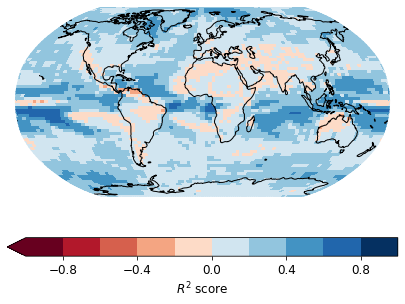

In [21]:
r2 = get_r2(p_l[0], gt_l[0])

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': r2_style["PROJECTION"]}, figsize=r2_style["FIGSIZE"])
plot_map(ax, r2[0], descriptions_list[0]["DATASET_DESCRIPTION"], r2_style)

plt.axis("off")
plt.show()

# Interpolate Ico $\Rightarrow$ Flat

In [3]:
conditions = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING": False, 
                            "CLIMATE_MODEL": "iHadCM3",
                            "GRID_TYPE": "Ico"},  # {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Ico",# {"MODEL_TYPE": "UNet_Flat",
                                   "LEARNING_RATE": 1e-3}
                                   # "RUN_NR": 0}
}

base_folder = "Output/Reproduce_new"
output_folder = "Scripts/"

In [4]:
predictions_list, descriptions_list = load_compatible_available_runs(base_folder, conditions)

10 matching runs found


In [5]:
data, gt = get_interpolated_data_and_gt(descriptions_list[0], predictions_list[0], output_folder=base_folder, script_folder=output_folder)

cdo(1) setgrid: Process started
cdo    remapcon: YAC first order conservative weights from unstructured (10230) to lonlat (96x73) grid
cdo(1) setgrid: Processed 1012968 values from 2 variables over 99 timesteps.
cdo    remapcon: Processed 1012968 values from 2 variables over 99 timesteps [0.88s 35MB].
cdo(1) setgrid: Process started
cdo    remapcon: YAC first order conservative weights from unstructured (10) to lonlat (96x73) grid
cdo(1) setgrid: Processed 1188 values from 2 variables over 99 timesteps.
cdo    remapcon: Processed 1188 values from 2 variables over 99 timesteps [0.12s 23MB].



When interpolating back to flat grid, only the 6nbs file is used, because otherwise we have wrong results due to overlap.
Interpolated file already exists, use existing version.
1 matching runs found
When interpolating to model grid, currently the iHadCM3 specifics are used.


In [17]:
conditions = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING": False, 
                            "CLIMATE_MODEL": "iHadCM3",
                            "GRID_TYPE": "Flat"},  # {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",# {"MODEL_TYPE": "UNet_Flat",
                                   "USE_COORD_CONV": False, 
                                   "USE_CYLINDRICAL_PADDING": False,
                                   "LOSS": "Masked_MSELoss",
                                   "LEARNING_RATE": 1e-3}
                                   # "RUN_NR": 0}
}

base_folder = "Output/Reproduce_new"
output_folder = "Scripts/"

d_l, p_l, gt_l, m_l = load_data_for_comparison(base_folder, conditions)

10 matching runs found


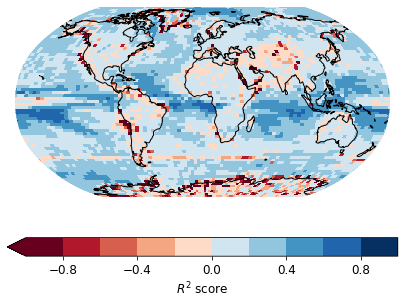

In [20]:
r2 = get_r2(data, gt)

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': r2_style["PROJECTION"]}, figsize=r2_style["FIGSIZE"])
plot_map(ax, r2, d_l[0]["DATASET_DESCRIPTION"], r2_style)

plt.axis("off")
plt.show()

In [27]:
from evaluate import *
get_weighted_average(r2[np.newaxis,...], d_l[0]["DATASET_DESCRIPTION"])

masked_array(data=[0.1388000259008686],
             mask=[False],
       fill_value=1e+20)

# Interpolate GT

In [40]:
conditions = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING": False, 
                            "CLIMATE_MODEL": "iHadCM3",
                            "GRID_TYPE": "Flat"},  # {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",# {"MODEL_TYPE": "UNet_Flat",
                                   "USE_COORD_CONV": False, 
                                   "USE_CYLINDRICAL_PADDING": False,
                                   "LOSS": "Masked_MSELoss",
                                   "LEARNING_RATE": 1e-3}
                                   # "RUN_NR": 0}
}

base_folder = "Output/Reproduce_new"
output_folder = "Scripts/"

In [41]:
predictions_list, descriptions_list = load_compatible_available_runs(base_folder, conditions)

10 matching runs found


In [42]:
ds = find_and_load_dataset(descriptions_list[0]["MODEL_TRAINING_DESCRIPTION"]["DATASET_FOLDER"], \
                      descriptions_list[0]["DATASET_DESCRIPTION"])

In [45]:
d = copy.copy(descriptions_list[0])
d["MODEL_TRAINING_DESCRIPTION"]["CONTAINS_GT"] = True

In [47]:
data, gt = get_interpolated_data_and_gt(d, ds["test"]["targets"], output_folder=base_folder, script_folder=output_folder, do_scaling=False)

Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.81s 28MB].
Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.08s 22MB].


done


Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    remap: Processed 693792 values from 1 variable over 99 timesteps [0.28s 30MB].
Warning (cdfScanVarAttr): NetCDF: Variable not found - t_bnds
cdo    remap: Processed 693792 values from 1 variable over 99 timesteps [0.10s 26MB].


writing predictions
writing descriptions
done
1 matching runs found


In [28]:
interpolate_predictions(d, ds["test"]["targets"], output_folder=base_folder, script_folder=output_folder, do_scaling=False)

('t', 'level-1_5', 'latitude', 'longitude')
('t', 'latitude', 'longitude')
t
is in dimscopy
longitude
is in dimscopy
latitude
is in dimscopy
level-1_4
level-1_5
level-1_6
{'t': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 't', size = 0, 'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 96, 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 73}
['t', 'latitude', 'longitude']
['latitude', 'longitude']



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.80s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.09s 22MB].


done


cdo    remap: Processed 700800 values from 1 variable over 100 timesteps [0.30s 29MB].
cdo    remap: Processed 700800 values from 1 variable over 100 timesteps [0.07s 26MB].


writing predictions
writing descriptions
done


In [48]:
r2 = get_r2(gt, data)

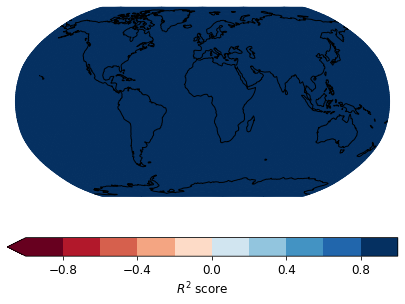

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': r2_style["PROJECTION"]}, figsize=r2_style["FIGSIZE"])

plot_ico_map(ax, r2, {"RESOLUTION": 5}, r2_style)

plt.axis("off")
plt.show()

# Icosahedral datasets.

In [2]:
for cm in ["iCESM", "iHadCM3", "isoGSM", "GISS", "ECHAM5"]:
    for var_name in ["isotopes", "tsurf", "prec"]:
        print(cm, var_name)
        interpolate_climate_model_data_to_ico_grid(model_name=cm, variable_name=var_name, script_folder="Scripts/",
                                                       dataset_folder="Datasets/", resolution=5, interpolation="cons1")

iCESM isotopes



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.42s 56MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 49MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.53s 58MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.14s 54MB]


iCESM tsurf



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.41s 56MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 49MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.44s 59MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.13s 55MB]


iCESM prec



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.41s 56MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 49MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.43s 59MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.13s 54MB]


iHadCM3 isotopes



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.40s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 47MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.44s 52MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.05s 48MB]


iHadCM3 tsurf



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.41s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 47MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.42s 51MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.06s 48MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid


iHadCM3 prec



cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.40s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 48MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.39s 51MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.05s 47MB]


isoGSM isotopes



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6952)
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.41s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 47MB]
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)


done


cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6968)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6993)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6983)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6977)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6991)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6987)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6968)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6941)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6966)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6961)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6947)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6987)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6998)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6969)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6987)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6951)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6971)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6953)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7000)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6947)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6963)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6956)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6969)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6964)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6966)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6940)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6928)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6976)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6966)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6984)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6993)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6959)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7001)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6978)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6985)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6963)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6956)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6964)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6963)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6995)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6953)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6982)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6968)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6968)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6964)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6965)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6966)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6979)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6982)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6996)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6940)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6959)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6981)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6990)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6945)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6999)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6986)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6988)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6938)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6978)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6938)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6960)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6993)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7000)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6936)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6982)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6979)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6970)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6969)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6949)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6960)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6977)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6941)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6974)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6928)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6953)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6974)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6939)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6971)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6958)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6940)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6982)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6970)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6957)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6971)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6993)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6970)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6936)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6989)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6984)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6940)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6947)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6953)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6970)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6987)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6974)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6949)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6928)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6951)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6959)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6973)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6932)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6947)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6939)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6953)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6937)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6977)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6953)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6948)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6968)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6959)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6964)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6951)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6957)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6971)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6978)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6949)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6959)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6962)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6977)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6936)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6964)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6945)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6956)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6973)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6976)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6940)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6984)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6933)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6953)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6973)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6959)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6966)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6958)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6946)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6981)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6971)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6987)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6981)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6980)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6934)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6988)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6957)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6960)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6993)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7000)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6936)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6982)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6983)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6972)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7001)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6995)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6956)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6951)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6971)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6951)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6969)
cdo remap: SCRIP first order con

isoGSM tsurf



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.44s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 47MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.42s 51MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.06s 47MB]


isoGSM prec



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.41s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 48MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.40s 51MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.06s 47MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid


GISS isotopes



cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.39s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 47MB]


done


cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7002)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7005)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7002)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7004)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7000)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6998)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7004)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6997)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7001)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6999)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7002)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6988)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6999)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6989)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6991)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6988)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6988)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6997)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6986)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7002)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6995)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6984)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6989)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6984)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6976)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6987)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6987)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [87.19s 58MB]
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7002)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7005)
cdo remap: SCRIP first order conservative weights from lon

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6996)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7000)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6998)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7004)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6997)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7001)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6999)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6989)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6991)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6988)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7006)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6988)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6997)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6998)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6989)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6984)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6976)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6987)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6979)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6976)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6982)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6977)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6985)
cdo remap: SCRIP first order con

GISS tsurf



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.41s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 48MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.40s 51MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.05s 47MB]


GISS prec



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.41s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 47MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.33s 51MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.04s 47MB]


ECHAM5 isotopes



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6949)
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.40s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6949)
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 47MB]
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6927)


done


cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6920)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6920)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6918)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6933)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6956)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6970)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6941)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6922)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6939)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6909)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6916)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6927)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6949)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6917)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6916)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6938)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6926)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6915)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6918)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6976)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6959)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6908)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6926)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6925)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6893)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6915)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6915)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6930)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6940)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6911)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6932)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6945)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6919)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6933)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6932)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6976)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6912)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6922)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6924)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6914)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6964)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6913)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6904)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6936)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6945)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6933)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6936)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6913)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6920)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6936)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6910)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6977)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6980)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6931)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6928)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6947)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6897)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6931)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6935)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6910)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6938)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6904)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6969)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6940)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6958)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6928)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6920)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6917)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6914)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6951)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6929)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6929)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6921)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6926)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6917)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6912)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6935)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6913)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6963)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6923)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6947)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6935)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6917)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6969)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6924)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6916)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6908)
cdo rema

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6922)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6928)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6958)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6943)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6923)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6972)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6985)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6921)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6917)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6928)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6933)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6910)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6932)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6909)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6890)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6927)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6930)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6916)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6944)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6935)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6917)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6978)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6916)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6903)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6930)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6918)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6926)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6934)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6947)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6929)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6925)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6909)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6934)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6924)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6935)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6913)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6965)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6933)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6929)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6908)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6929)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6900)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6957)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6953)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6922)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6940)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6926)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6916)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6926)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6910)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6944)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6957)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6941)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6919)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6940)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6936)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6910)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6926)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6935)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6928)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6953)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6951)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6942)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6911)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6921)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6929)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6942)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6954)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6928)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6947)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6948)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6897)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6931)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6935)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6910)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6919)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6960)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6892)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6913)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6918)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6924)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6983)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6951)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6907)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6922)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6945)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6946)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6912)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6925)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6960)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6923)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6961)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6963)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6919)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6918)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6956)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6937)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6912)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6936)
cdo remap: SCRIP first order con

cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6945)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6916)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6960)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6928)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6911)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6958)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6951)
cdo remap: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6922)
cdo remap: SCRIP first order con

ECHAM5 tsurf



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.44s 54MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 48MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.37s 52MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.04s 48MB]


ECHAM5 prec



cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.39s 55MB]
cdo gencon: SCRIP first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo gencon: Processed 7008 values from 1 variable over 1 timestep [0.04s 48MB]


done


cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.37s 52MB]
cdo remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.04s 48MB]


In [141]:
for cm in ["iHadCM3"]:
    for var_name in ["isotopes", "temp", "precip", "slp"]:
        print(cm, var_name)
        interpolate_climate_model_data_to_ico_grid(model_name=cm, variable_name=var_name, script_folder="Scripts/",
                                                       dataset_folder="Datasets_old/", resolution=5, interpolation="cons1")

iHadCM3 isotopes



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 3 variables over 1 timestep [0.74s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 3 variables over 1 timestep [0.02s 25MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6800)


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6813)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6815)
cdo    remap: Processed 24240672 values from 3 variables over 1153 timesteps [6.00s 41MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6800)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6813)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6815)
cdo    remap: Processed 24240672 values from 3

iHadCM3 temp



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.74s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 24MB].


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [1.79s 35MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [0.07s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid


iHadCM3 precip



cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.74s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [1.79s 35MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (0)
cdo    remap: Processed 8080224 values from 1 variable over 1153 timesteps [0.10s 29MB].


iHadCM3 slp



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.80s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 22MB].


done


cdo    remap: Processed 8073216 values from 1 variable over 1152 timesteps [0.90s 31MB].
cdo    remap: Processed 8073216 values from 1 variable over 1152 timesteps [0.13s 28MB].
